In [32]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

allData = pd.read_csv("../AllVexData_2022_2_20.csv")

In [33]:
a = allData[allData["Event Region"] == "Illinois"]
# a = allData

# Filter out where the data does not have a driver score for the skills
a = a[pd.notna(a["Highest Driver Score Timestamp"])]

In [34]:
dates = [z.split(" ")[0] for z in a["Highest Driver Score Timestamp"][pd.notna(a["Highest Driver Score Timestamp"])]]
dates = [[int(y) for y in z.split("-")] for z in dates]
timedates = []
for date in dates:
  timedates.append((datetime.datetime(date[0], date[1], date[2], 0, 0).timestamp() // (3600 * 24 * 7)) * (3600 * 24 * 7))

a["Datetime"] = timedates

In [19]:
print(a.columns)

Index(['Rank', 'Score', 'Programming Skills', 'Driver Skills',
       'Highest Programming Skills', 'Highest Driver Skills',
       'Highest Programming Score Timestamp', 'Highest Driver Score Timestamp',
       'Highest Programming Score Stop Time', 'Highest Driver Score Stop Time',
       'Team Number', 'Team Name', 'Organization', 'Event Region',
       'Country/Region', 'Datetime'],
      dtype='object')


time_periods_driver = [1667433600.0, 1667433600.0, 1667433600.0, 1668643200.0, 1668643200.0, 1668643200.0, 1670457600.0, 1670457600.0, 1670457600.0, 1672876800.0, 1672876800.0, 1672876800.0, 1673481600.0, 1673481600.0, 1673481600.0, 1674086400.0, 1674086400.0, 1674086400.0, 1674691200.0, 1674691200.0, 1674691200.0, 1675296000.0, 1675296000.0, 1675296000.0, 1675900800.0, 1675900800.0, 1675900800.0, 1676505600.0, 1676505600.0, 1676505600.0]
scores_driver =  [115, 61, 26, 100, 88, 82, 100, 67, 42, 127, 109, 72, 103, 81, 79, 86, 78, 68, 108, 102, 75, 97, 89, 78, 153, 74, 70, 137, 120, 110]
time_periods_programming = [1667433600.0, 1667433600.0, 1667433600.0, 1668643200.0, 1668643200.0, 1668643200.0, 1670457600.0, 1670457600.0, 1670457600.0, 1672876800.0, 1672876800.0, 1672876800.0, 1673481600.0, 1673481600.0, 1673481600.0, 1674086400.0, 1674086400.0, 1674086400.0, 1674691200.0, 1674691200.0, 1674691200.0, 1675296000.0, 1675296000.0, 1675296000.0, 1675900800.0, 1675900800.0, 1675900800.0, 1

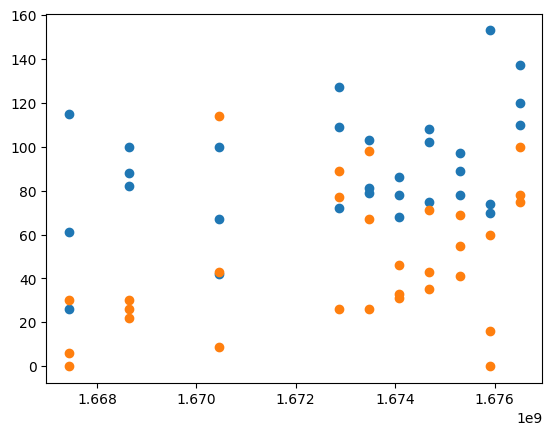

In [35]:

def get_highest(_type, top_n):
  unique_time_periods = []
  highest_scores = []
  for _datetime in np.unique(a["Datetime"]):
    # print(_datetime)
    b = a[a["Datetime"] == _datetime]
    # print("Max:", max(b[f"Highest {_type} Skills"][pd.notna(b[f"Highest {_type} Skills"])]))
    for i in range(top_n):
      try:
        # highest_scores.append(max(b[f"Highest {_type} Skills"][pd.notna(b[f"Highest {_type} Skills"])]))
        highest_scores.append(max(b[f"Highest {_type} Skills"][pd.notna(b[f"Highest {_type} Skills"])]))
        b = b[b[f"Highest {_type} Skills"] != max(b[f"Highest {_type} Skills"][pd.notna(b[f"Highest {_type} Skills"])])]
        unique_time_periods.append(_datetime)
        
        # Remove the highest scores
        # highest_scores.pop(max(b[f"Score"][pd.notna(b[f"Score"])]))

      except Exception as e:
        pass
      

  plt.plot(unique_time_periods, highest_scores, "o")
  print(f"time_periods_{_type.lower()} =",unique_time_periods)
  print(f"scores_{_type.lower()} = ", highest_scores)

get_highest("Driver", top_n=3)
get_highest("Programming", top_n=3)  

Index(['Rank', 'Score', 'Programming Skills', 'Driver Skills',
       'Highest Programming Skills', 'Highest Driver Skills',
       'Highest Programming Score Timestamp', 'Highest Driver Score Timestamp',
       'Highest Programming Score Stop Time', 'Highest Driver Score Stop Time',
       'Team Number', 'Team Name', 'Organization', 'Event Region',
       'Country / Region', 'Datetime'],
      dtype='object')


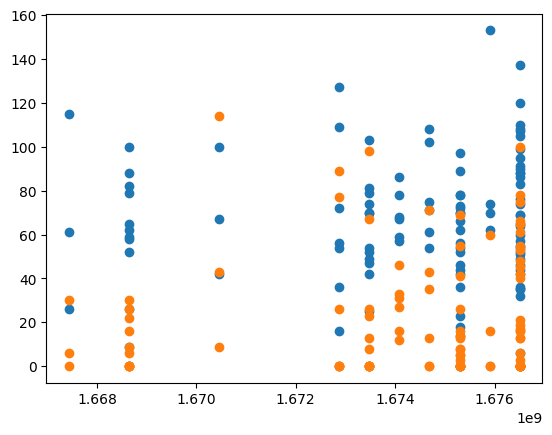

In [36]:
print(a.columns)
# plt.plot(a["Datetime"], a["Highest Driver Skills"], "o")
plt.plot(a["Datetime"], a["Highest Driver Skills"], "o")
plt.plot(a["Datetime"], a["Highest Programming Skills"], "o")
# print(2.9405587061541693e-05 * (1673676000.0 - min(a["Datetime"])))
# plt.plot([1673676000.0, 1673676000.0], [0, 2.9405587061541693e-05 * (1673676000.0 - min(a["Datetime"]))])

In [17]:
ys = (max(a[a["Datetime"] == max(a["Datetime"])]["Highest Driver Skills"]), max(a[a["Datetime"] == min(a["Datetime"])]["Highest Driver Skills"]))
xs = max(a["Datetime"]), min(a["Datetime"])

In [20]:
ys

(113, 90)

In [38]:
previous_data = pd.read_csv("../AllVexData_2022_11_20.csv")
current_data = pd.read_csv("../AllVexData_2022_2_20.csv")


Find the delta points for a period of time to estimate the points gained as a function of time

In [39]:
def turn_datetimes_to_timestamps(a):
  dates = [z.split(" ")[0] for z in a["Highest Driver Score Timestamp"][pd.notna(a["Highest Driver Score Timestamp"])]]
  dates = [[int(y) for y in z.split("-")] for z in dates]
  timedates = []
  for date in dates:
    timedates.append((datetime.datetime(date[0], date[1], date[2], 0, 0).timestamp() // (3600 * 24 * 7)) * (3600 * 24 * 7))
  a["Datetime"] = timedates
  return a

In [40]:
# Remove any teams that are in the current data that werent in the previous data
current_data = current_data[current_data["Team Number"].isin(previous_data["Team Number"])]

current_data = current_data[pd.notna(current_data["Highest Driver Score Timestamp"])]

# Remove any teams that are in previous data that aren't in current  data
previous_data = previous_data[previous_data["Team Number"].isin(current_data["Team Number"])]
previous_data = previous_data[pd.notna(previous_data["Highest Driver Score Timestamp"])]


current_data = turn_datetimes_to_timestamps(current_data)
previous_data = turn_datetimes_to_timestamps(previous_data)


In [41]:
times = []
slopes = []
scores = []
for row in current_data["Team Number"]:
  # see the index of the team number in previous data
  try:
    index = (previous_data["Team Number"].index[previous_data["Team Number"] == row][0])
  except Exception as e:
    print(e)
  # Change in points
  delta_points = float(current_data["Score"][current_data["Team Number"] == row].values[0] - previous_data["Score"][index])
  if delta_points == 0:
    continue
  # Change in driver skills
  delta_time = float(current_data["Datetime"][current_data["Team Number"] == row] - previous_data["Datetime"][index])
  if delta_time == 0:
    continue
  print(delta_time, delta_points)
  times.append(previous_data["Datetime"][index])
  scores.append(previous_data["Score"][index])
  slopes.append(delta_points / delta_time)

print(slopes)

7862400.0 135.0
7257600.0 104.0
4838400.0 131.0
6048000.0 178.0
4233600.0 47.0
7862400.0 67.0
7862400.0 103.0
7862400.0 84.0
1814400.0 56.0
7862400.0 38.0
7257600.0 114.0
7862400.0 20.0
8467200.0 60.0
5443200.0 25.0
7257600.0 76.0
7862400.0 66.0
6048000.0 41.0
7257600.0 89.0
7257600.0 53.0
6048000.0 39.0
6048000.0 42.0
5443200.0 16.0
4838400.0 30.0
7862400.0 41.0
9072000.0 62.0
7862400.0 44.0
7257600.0 58.0
6652800.0 15.0
7862400.0 34.0
4838400.0 30.0
9072000.0 52.0
6652800.0 19.0
9676800.0 31.0
4233600.0 24.0
6048000.0 33.0
7862400.0 22.0
9676800.0 38.0
5443200.0 22.0
[1.717032967032967e-05, 1.4329805996472663e-05, 2.7075066137566138e-05, 2.943121693121693e-05, 1.1101662887377172e-05, 8.521571021571021e-06, 1.31003256003256e-05, 1.0683760683760684e-05, 3.08641975308642e-05, 4.833129833129833e-06, 1.5707671957671957e-05, 2.543752543752544e-06, 7.086167800453515e-06, 4.592886537330982e-06, 1.0471781305114639e-05, 8.394383394383394e-06, 6.779100529100529e-06, 1.2263007054673722e-05, 7.30

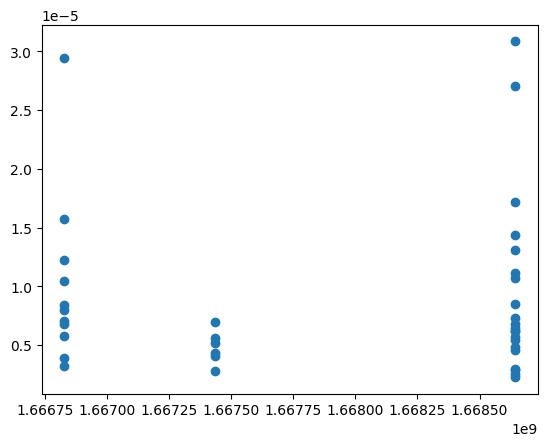

In [42]:
plt.plot(times, slopes, "o")

In [46]:
#                                               today          feb 26
print((np.mean(slopes) + np.std(slopes) * 2) * -(1674315656 - 1677426056))

70.92902241283133


In [45]:
import time
time

1676907641.2009997

In [190]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

import os

all_data = [pd.read_csv("../" + f) for f in os.listdir("../") if "AllVexData" in f]

In [191]:
all_data = [all_data[-1], all_data[1], all_data[4], all_data[3], all_data[0], all_data[2]]

In [193]:


all_data = [z[z["Event Region"] == "Illinois"] for z in all_data]
# a = allData

# Filter out where the data does not have a driver score for the skills
all_data = [z[pd.notna(z["Highest Driver Score Timestamp"])] for z in all_data]

dates = [[z.split(" ")[0] for z in x["Highest Driver Score Timestamp"][pd.notna(x["Highest Driver Score Timestamp"])]] for x in all_data]
dates = [[[int(y) for y in z.split("-")] for z in x] for x in dates]

timedates = []

for i, date_array in enumerate(dates):
  timedates.append([])
  for date in date_array:
    timedates[i].append((datetime.datetime(date[0], date[1], date[2], 0, 0).timestamp() // (3600 * 24 * 7)) * (3600 * 24 * 7))
for i, data in enumerate(all_data):
  data["Datetime"] = timedates[i]

In [194]:
all_teams = {}

for data in all_data:
  for team in data["Team Number"]:
    if team not in all_teams:
      all_teams[team] = []

for data in all_data:
  for i, team in enumerate(data["Team Number"]):
    all_teams[team].append([list(data["Datetime"])[i], list(data["Score"])[i]])


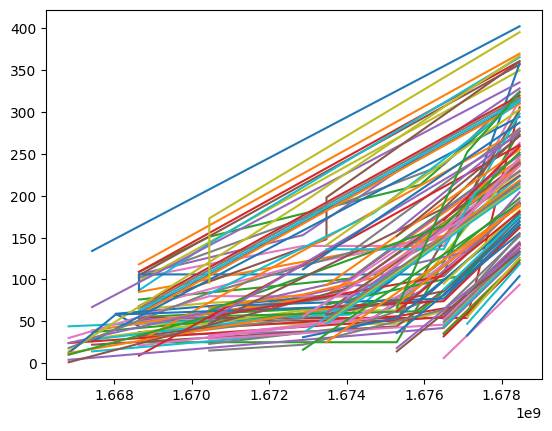

In [212]:
for team in all_teams:
  _ = (all_teams[team])
  plt.plot([z[0] for z in _], [z[1] for z in _])
plt.show()

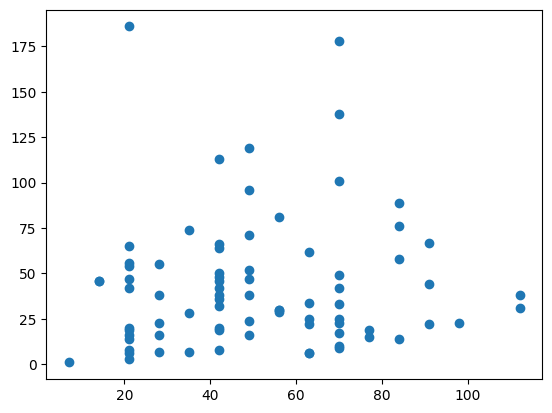

In [196]:
scores = []
times = []
start_times = []
for team in all_teams:
  team_scores = [z[1] for z in all_teams[team]]
  team_times = np.array([z[0] for z in all_teams[team]])

  team_scores_unique = np.unique(team_scores)

  team_times = team_times[np.array([team_scores.index(t) for t in team_scores_unique])]
  
  team_scores = team_scores_unique
  if len(team_scores) > 1:
    for i in range(len(team_scores) - 1):
      if team_times[i+1] - team_times[i] > 0:
        scores.append(team_scores[i + 1] - team_scores[i])
        times.append(team_times[i + 1] - team_times[i])
        start_times.append(team_times[i])
  
plt.plot(np.array(times) / (3600 * 24), scores, "o")

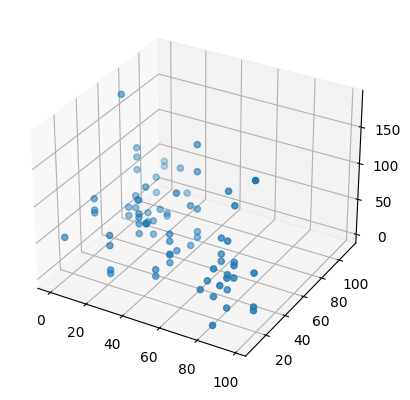

In [197]:
# Make a 3d graph where the x axis is the start_times array, y axis is times array, and z axis is scoares array
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(((np.array(start_times) - min(start_times)) / (3600 * 24)), np.array(times) / (3600 * 24), scores)

plt.show()

In [198]:
print(times)
print(scores)

[1814400.0, 5443200.0, 4233600.0, 4233600.0, 4233600.0, 3628800.0, 1814400.0, 7862400.0, 5443200.0, 4838400.0, 4233600.0, 3628800.0, 1814400.0, 3628800.0, 6652800.0, 1814400.0, 3628800.0, 4838400.0, 3628800.0, 4838400.0, 3024000.0, 8467200.0, 7257600.0, 1209600.0, 6048000.0, 604800.0, 6048000.0, 6048000.0, 1814400.0, 6652800.0, 1814400.0, 5443200.0, 1814400.0, 4838400.0, 3628800.0, 4233600.0, 4233600.0, 5443200.0, 7862400.0, 9676800.0, 7257600.0, 7862400.0, 1814400.0, 6048000.0, 3628800.0, 3628800.0, 6048000.0, 5443200.0, 1209600.0, 6048000.0, 1814400.0, 7257600.0, 3628800.0, 5443200.0, 9676800.0, 7257600.0, 3628800.0, 2419200.0, 3628800.0, 2419200.0, 4233600.0, 6048000.0, 2419200.0, 1814400.0, 6048000.0, 6048000.0, 6048000.0, 6048000.0, 2419200.0, 3628800.0, 3628800.0, 3024000.0, 1814400.0, 1814400.0, 3024000.0, 4233600.0, 2419200.0, 1814400.0]
[42, 62, 47, 38, 71, 64, 56, 67, 25, 81, 52, 32, 8, 8, 15, 3, 38, 30, 113, 29, 74, 23, 14, 46, 23, 1, 42, 25, 16, 19, 14, 6, 47, 30, 50, 16, 2

In [170]:
delta_point_for_time = lambda x: 12.773189489709624 + 1.0244611827013449e-5*x - 7.720338924976126e-13*x**2

In [206]:
delta_point_for_time = lambda x: 31.88114826803003 + 3e-5*x - 7.760015200910699e-13*x**2

In [207]:
for team in all_teams:
    print(all_teams[team].pop(-1))

[1678462856, 165.9258981344871]
[1678462856, 155.5748677921018]
[1678462856, 255.21765418311645]
[1678462856, 146.5748677921018]
[1678462856, 199.37712476075066]
[1678462856, 142.5748677921018]
[1678462856, 186.37712476075066]
[1678462856, 277.34108036920844]
[1678462856, 135.5748677921018]
[1678462856, 186.43662303257085]
[1678462856, 143.5748677921018]
[1678462856, 192.34108036920844]
[1678462856, 146.7580162280782]
[1678462856, 105.5748677921018]
[1678462856, 98.92589813448711]
[1678462856, 244.24168377747796]
[1678462856, 190.34108036920844]
[1678462856, 102.5748677921018]
[1678462856, 125.75801622807818]
[1678462856, 99.5748677921018]
[1678462856, 96.5748677921018]
[1678462856, 95.5748677921018]
[1678462856, 113.74600143089742]
[1678462856, 91.5748677921018]
[1678462856, 138.7580162280782]
[1678462856, 88.5748677921018]
[1678462856, 230.11627998917334]
[1678462856, 191.34108036920844]
[1678462856, 108.11627998917332]
[1678462856, 147.74600143089742]
[1678462856, 127.92612211255134

In [208]:
import time
for team in all_teams:
  max_score = max([z[1] for z in all_teams[team]])

  max_time = all_teams[team][[z[1] for z in all_teams[team]].index(max_score)][0]

  all_teams[team].append([1678462856, delta_point_for_time(1678462856 - max_time) + max_score])
  # all_teams[team].append([time.time(), delta_point_for_time(time.time() - max_time) + max_score])



In [209]:
print(all_teams["60441A"])

[[1666828800.0, 24], [1666828800.0, 24], [1666828800.0, 24], [1674086400.0, 100], [1674086400.0, 100], [1674086400.0, 100], [1678462856, 248.31178626809736]]


In [210]:
theoretical_max_scores = []
for team in all_teams:
    theoretical_max_scores.append(max([z[1] for z in all_teams[team]]))

In [211]:
theoretical_max_scores.sort(reverse=True)
print([round(z) for z in theoretical_max_scores[:10]])

[402, 395, 370, 367, 365, 361, 360, 358, 357, 350]
